In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [189]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)

In [190]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [191]:
df.shape

(9704, 11)

In [192]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [193]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [194]:
#Preparing Data

df.columns = df.columns.str.lower().str.replace(' ', '_')

for cols in df.columns:
    if df[cols].dtypes == 'object':
        df[cols] = df[cols].str.lower().str.replace(' ', '_').str.replace('-', '_')

In [195]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all_wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front_wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front_wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all_wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all_wheel_drive,2.0,12.488369


In [196]:
#EDA

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['europe' 'usa' 'asia']
3

fuel_type
['gasoline' 'diesel']
2

drivetrain
['all_wheel_drive' 'front_wheel_drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [197]:
df.fuel_efficiency_mpg.describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

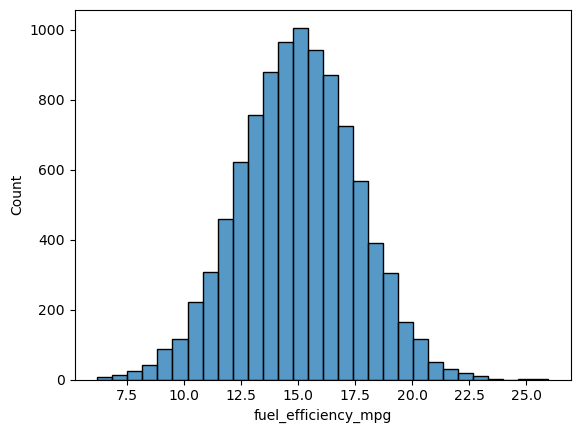

In [198]:
sns.histplot(df.fuel_efficiency_mpg, bins=30)
plt.show()

In [199]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [200]:
# Setting up validation framework

n_train = int(0.6 * len(df))
n_val = int(0.2 * len(df))
n_test = int(len(df) - (n_train + n_val))

idx = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train], :].copy()
df_val = df.iloc[idx[n_train:n_train+n_val], :].copy()
df_test = df.iloc[idx[n_train+n_val:], :].copy()

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [201]:
n_train, n_val, n_test

(5822, 1940, 1942)

In [202]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
483,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all_wheel_drive,2.0
7506,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front_wheel_drive,2.0
8795,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front_wheel_drive,2.0
1688,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all_wheel_drive,1.0
6217,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all_wheel_drive,NaN


In [203]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [204]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [205]:
#Base features
base_features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [227]:
#Preapre dataset function
def prepare_X(df, val):
    df_new = df.copy()
    df_new = df_new[base_features]
    df_new['horsepower'] = df_new['horsepower'].fillna(val)

    return df_new

#Weights calculation function
def weights(X, Y, r):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(len(XTX))
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(Y)
    
    return w

#RMSE calculation function
def RMSE(y_pred, y_val):
    err = y_pred - y_val
    sq_err = err ** 2
    mse = sq_err.mean()
    rmse = np.sqrt(mse)

    return rmse

In [228]:
#Filling NA with 0 and no regularization
x_train = prepare_X(df_train, 0)
w = weights(x_train, y_train, 0)

x_final = np.column_stack([np.ones(len(x_train)), x_train])
y_pred = x_final.dot(w)

round(RMSE(y_pred, y_train), 2)

np.float64(0.52)

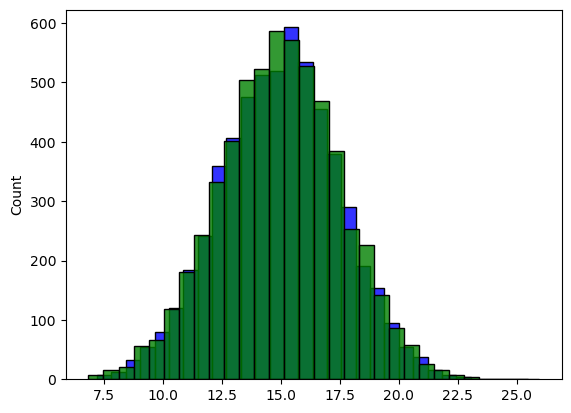

In [229]:
sns.histplot(y_pred, bins = 30, color='blue', alpha=0.8)
sns.histplot(y_train, bins = 30, color='green', alpha=0.8)
plt.show()

In [230]:
#Validating the model
x_train = prepare_X(df_val, 0)

x_final = np.column_stack([np.ones(len(x_train)), x_train])
y_pred = x_final.dot(w)

round(RMSE(y_pred, y_val), 2)

np.float64(0.52)

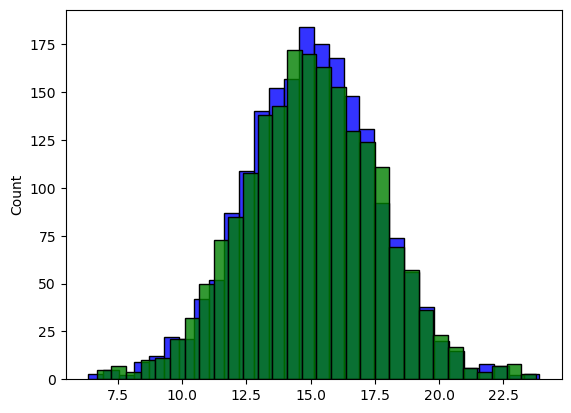

In [231]:
sns.histplot(y_pred, bins = 30, color='blue', alpha=0.8)
sns.histplot(y_val, bins = 30, color='green', alpha=0.8)
plt.show()

In [232]:
#Filling NA with mode and no regularization
x_train = prepare_X(df_train, df_train.horsepower.mean())
w = weights(x_train, y_train, 0)

x_final = np.column_stack([np.ones(len(x_train)), x_train])
y_pred = x_final.dot(w)

round(RMSE(y_pred, y_train), 2)

np.float64(0.46)

In [233]:
#Validating the model
x_train = prepare_X(df_val, df_val.horsepower.mean())

x_final = np.column_stack([np.ones(len(x_train)), x_train])
y_pred = x_final.dot(w)

round(RMSE(y_pred, y_val), 2)

np.float64(0.46)

In [240]:
#Filling NA with 0 but with regularization - Test on validation model
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    x_train = prepare_X(df_train, 0)
    w = weights(x_train, y_train, r)

    x_train = prepare_X(df_val, 0)
    
    x_final = np.column_stack([np.ones(len(x_train)), x_train])
    y_pred = x_final.dot(w)
    
    print(r, w[0], round(RMSE(y_pred, y_val), 2))

0 28.810749329447 0.52
0.01 24.910505404130504 0.52
0.1 11.22918818158919 0.52
1 1.7296519833302575 0.52
5 0.36338861705603326 0.52
10 0.18285102562996358 0.52
100 0.018396690310965032 0.52


## Question 5 - Combining all the above code into one function for calculating results at different seeds

In [249]:
rmse_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Setting up validation framework
    
    n_train = int(0.6 * len(df))
    n_val = int(0.2 * len(df))
    n_test = int(len(df) - (n_train + n_val))
    
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train], :].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val], :].copy()
    df_test = df.iloc[idx[n_train+n_val:], :].copy()
    
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    #Base features
    base_features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    
    #Preapre dataset function
    def prepare_X(df, val):
        df_new = df.copy()
        df_new = df_new[base_features]
        df_new['horsepower'] = df_new['horsepower'].fillna(val)
    
        return df_new
    
    #Weights calculation function
    def weights(X, Y, r):
        ones = np.ones(len(X))
        X = np.column_stack([ones, X])
    
        XTX = X.T.dot(X)
        XTX = XTX + r * np.eye(len(XTX))
        XTX_inv = np.linalg.inv(XTX)
    
        w = XTX_inv.dot(X.T).dot(Y)
        
        return w
    
    #RMSE calculation function
    def RMSE(y_pred, y_val):
        err = y_pred - y_val
        sq_err = err ** 2
        mse = sq_err.mean()
        rmse = np.sqrt(mse)
    
        return rmse
    
    #Filling NA with 0 and no regularization
    x_train = prepare_X(df_train, 0)
    w = weights(x_train, y_train, 0)
    
    x_train = prepare_X(df_val, 0)
    
    x_final = np.column_stack([np.ones(len(x_train)), x_train])
    y_pred = x_final.dot(w)
    
    rmse_list.append(RMSE(y_pred, y_val))

In [250]:
rmse_list

[np.float64(0.5210993169601764),
 np.float64(0.5218422383656935),
 np.float64(0.5230384520042022),
 np.float64(0.5161215334520274),
 np.float64(0.5111869530280668),
 np.float64(0.5286833855544149),
 np.float64(0.5322418918567279),
 np.float64(0.5095258233932748),
 np.float64(0.5149083792268891),
 np.float64(0.5131330922627657)]

In [255]:
round(np.std(rmse_list), 3)

np.float64(0.007)

## Question 6 - Seed 9 and combine val and test datasets - with regularization

In [256]:
for seed in [9]:
    # Setting up validation framework
    
    n_train = int(0.6 * len(df))
    n_val = int(0.2 * len(df))
    n_test = int(len(df) - (n_train + n_val))
    
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train], :].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val], :].copy()
    df_test = df.iloc[idx[n_train+n_val:], :].copy()
    
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    #Base features
    base_features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    
    #Preapre dataset function
    def prepare_X(df, val):
        df_new = df.copy()
        df_new = df_new[base_features]
        df_new['horsepower'] = df_new['horsepower'].fillna(val)
    
        return df_new
    
    #Weights calculation function
    def weights(X, Y, r):
        ones = np.ones(len(X))
        X = np.column_stack([ones, X])
    
        XTX = X.T.dot(X)
        XTX = XTX + r * np.eye(len(XTX))
        XTX_inv = np.linalg.inv(XTX)
    
        w = XTX_inv.dot(X.T).dot(Y)
        
        return w
    
    #RMSE calculation function
    def RMSE(y_pred, y_val):
        err = y_pred - y_val
        sq_err = err ** 2
        mse = sq_err.mean()
        rmse = np.sqrt(mse)
    
        return rmse
    
    #Filling NA with 0 and no regularization
    df_combo = np.column_stack([df_train, df_val])
    y_combo = np.concatenate([y_train, y_val])
    x_train = prepare_X(df_combo, 0)
    w = weights(x_train, y_combo, 0.001)
    
    x_train = prepare_X(df_test, 0)
    
    x_final = np.column_stack([np.ones(len(x_train)), x_train])
    y_pred = x_final.dot(w)
    
    RMSE(y_pred, y_val)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5822 and the array at index 1 has size 1940